In [92]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [93]:
dp = pd.read_excel("MultiLinear.xlsx")
x_1 = np.array(dp['X1'])
x_2 = np.array(dp['X2'])


X = dp[['X1','X2']].values
y = dp['y'].values
Y= y.reshape(len(y),1)

In [94]:
def grad_decent(X,y,theta_val,learn_rate=0.01,iter=10000):
    
    sample_c = len(y)
    
    cost_hist = np.zeros(iter)
    theta_hist = np.zeros((iter,3))
    
    for i in range(iter):
        prediction = np.dot(X,theta_val)
        
        theta_val = theta_val - (1/sample_c)*learn_rate*(X.T.dot((prediction-y)))
        theta_hist[i,:] = theta_val.T
        
        cost = (1/(2*sample_c)) * np.sum(np.square(prediction-y))
        cost_hist[i] = cost
        
    return theta_val,cost_hist,theta_hist

In [95]:
learn_rate  =0.0001
no_iterat= 20000

theta = np.array([[0],[1],[1]])
x_b = np.c_[np.ones((len(X),1)),X]
theta,cost_hist,theta_hist = grad_decent(x_b,Y,theta,learn_rate,no_iterat)

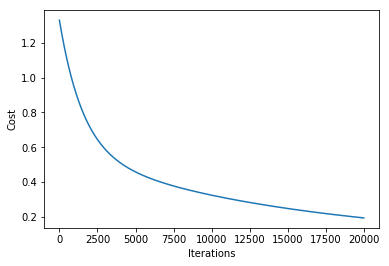

In [96]:
plt.plot(range(no_iterat),cost_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

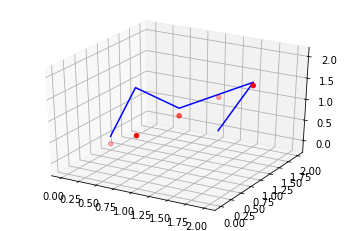

In [97]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x1 = np.array(dp['X1'])
x2 = np.array(dp['X2'])
y0 = np.array(dp['y'])
#y = x_b.dot(theta)
y = x_b.dot(theta)

ax.plot3D(x1, x2, y0, 'blue')
ax.scatter(x1,x2,y,color ='r')

In [98]:
cost_hist

array([1.33125   , 1.33072245, 1.33019523, ..., 0.19258222, 0.19257304,
       0.19256385])